In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ipywidgets import Button, HBox, VBox
import numpy as np
import json
from IPython import embed

In [2]:
outid = '1713738650'
seed = 1
with open(f'../outputs/{outid}/posterior_vals_seed{9999+seed}.json', 'r') as fh:
    data = json.load(fh)

In [6]:
def posterior_at_t(data, t, animate=False, interval=100, repeat=False, no_target=False):
    plt.clf()
    fig, ax = plt.subplots()
    
    vals = data[f'{t if not animate else 0}']
    vals = np.array(vals)[(1 if no_target else 0):, :]
    y = vals[:, 0]
    mean = vals[:, 1]
    std = vals[:, 2]
    # y, mean, std = list(zip(*vals))
    # y, mean, std = map(np.array, [y, mean, std])
    x = 1 + np.arange(len(y))
    ax.plot(x, y, label="True")
    ax.plot(x, mean, label="Posterior", color="orange")
    ax.fill_between(x, mean-std, mean+std, alpha=0.2, color="orange")
    _posterior_trend = np.polyfit(x, mean, 8)
    posterior_trend = np.poly1d(_posterior_trend)
    posterior_trend_y = posterior_trend(x)
    ax.plot(x, posterior_trend_y, "r--", label=f"Posterior Trend")  # (s={_posterior_trend[0]})
    ax.legend()
    ax.set_title(f"t = {t if not animate else 0}")
    ax.set_ylabel("Similarity")
    ax.set_xlabel("True Rank")
    
    def update(frame):
        ax.clear()
        vals = data[f'{frame}']
        vals = np.array(vals)[(1 if no_target else 0):, :]
        y = vals[:, 0]
        mean = vals[:, 1]
        std = vals[:, 2]
        # y, mean, std = list(zip(*vals))
        # y, mean, std = map(np.array, [y, mean, std])
        x = 1 + np.arange(len(y))
        ax.plot(x[:500], y[:500], label="True")
        ax.plot(x[:500], mean[:500], label="Posterior", color="orange")
        ax.fill_between(x[:500], (mean-std)[:500], (mean+std)[:500], alpha=0.2, color="orange")
        _posterior_trend = np.polyfit(x, mean, 8)
        posterior_trend = np.poly1d(_posterior_trend)
        posterior_trend_y = posterior_trend(x)
        # posterior_trend_y[np.where(np.isin(x, [500,750]))[0]] = [0.5, 0.5]
        ax.plot(x[:500], posterior_trend_y[:500], "r--", label=f"Posterior Trend")  # (s={_posterior_trend[0]})
        ax.legend()
        ax.set_title(f"t = {frame}")
        ax.set_ylabel("Similarity")
        ax.set_xlabel("True Rank")
    
    if animate:
        ani = animation.FuncAnimation(fig=fig, func=update, frames=range(t), interval=interval, repeat=repeat, repeat_delay=0)
        # plt.show()
        return plt, ani
    plt.show()

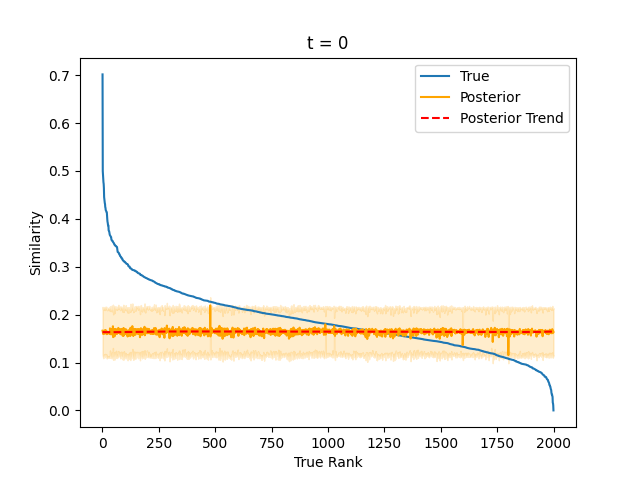

In [7]:
plt, ani = posterior_at_t(data, 99, animate=True, interval=100, repeat=True, no_target=True)

In [8]:
ani.pause()

In [ ]:
ani.save("test.gif", writer="imagemagick")